# A simple analysis using the plot-likert module

In [2]:
from IPython.display import display, Markdown, Latex # Print markdown in jupyter
import os
import pandas as pd # Dataframes
import plot_likert # Likert scale analysis

### 1. Import dataset

In [3]:
datadir = 'data/' # add this directory in your system and store your csv data there.
table = 'scores_A.csv' # the name of my dataset. Change it to fit yours.

# Read data into a pandas dataframe
df = pd.read_csv(os.path.join(datadir, table), sep= '\t') # my data is actually a tab-separated table

if not df.empty:
    display(Markdown(f"""_Your file `{table}` is loaded_"""))
    # Look at the description of your dataset
    df.info()
else:
    print(f"""Your dataset was not loaded""")

_Your file `scores_A.csv` is loaded_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  464 non-null    object
 1   Question     464 non-null    object
 2   Response     464 non-null    object
 3   Number       464 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.6+ KB


#### Get some key descriptions of the dataset

In [4]:
# Get length of the dataset
df_len = len(df['Participant'])
# Get number of unique questions
questions_n = len(df['Question'].unique())
# Get number of unique participants
participants_n = len(df['Participant'].unique())
# Compensate for the difference between zero indexing and early stop in range function later
zero_range_diff = 2
range_top = df_len + zero_range_diff - participants_n

display(Markdown(f"""_Your dataset contains {questions_n} responses for each of the {participants_n} participants in my data.
Responses are stacked on top of each other so a new participant is shown every {questions_n} rows.
Here are all the columns and the top {questions_n * 2 + 1} rows_"""))
df.head(questions_n * 2 + 1)

_Your dataset contains 16 responses for each of the 29 participants in my data.
Responses are stacked on top of each other so a new participant is shown every 16 rows.
Here are all the columns and the top 33 rows_

,Participant,Question,Response,Number
0,P1,Q1,A,5
1,P1,Q2,SD,2
2,P1,Q3,SD,2
3,P1,Q4,A,5
4,P1,Q5,N,4
5,P1,Q6,A,5
6,P1,Q7,N,4
7,P1,Q8,SA,6
8,P1,Q9,SA,6
9,P1,Q10,D,3


### 2. Wrangle dataset
The data must be in an `ID  Question1  Question2  QuestionN` format, so we must make it fit.

In [7]:
# There are no missing (NaN) values are contained in this dataset

# Get likert scores responses in a list of list with all 29 participants and 11 responses each
scores = [df.iloc[x:x+questions_n].Response.tolist() for x in range(0, range_top, questions_n)]

# The responses must be turned into a format that fits the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# In this case, the  responses have been abbreviated as "SA, A, N" etc. We will map the responses to a standard format.
scores5_0_dict = {
'SA': '5 - Strongly Agree',  
'A': '4 - Agree',
'N': '3 - Neither Agree nor Disagree',
'D': '2 - Disagree',
'SD': '1 - Strongly Disagree',
'NS': '0 - Not Sure',
'NO RESPONSE': None
}
scores = [[scores5_0_dict[x] for x in subl] for subl in scores]

# =============== IGNORE THIS BIT
# The numbers in scores must be turned into strings to fit the scale in plot_likert (see https://github.com/nmalkin/plot-likert/blob/master/plot_likert/scales.py)
# scores = [[str(x) for x in subl] for subl in scores]
# Get participant IDs
# parts = [df.iat[x,0] for x in range(0, 310, 11)]
# df2['participant'] = parts

In [8]:
# Create dataframe with the scores, then add the participant IDs
question_texts = [
"1. I enjoy listening to the Spanish language.",
"2. I see no connection between knowledge of the Spanish language and being Latina/o.",
"3. I associate Spanish with low economic status.",
"4. I like being identified as a member of the Hispanic community.",
"5. I'd like to learn more about the different countries/cultures within the Latina/o world.",
"6. I am proud of the Latina/o world.",
"7. I associate Spanish with prestige.",
"8. I think it is important to learn about my historical and cultural background.",
"9. Learning Spanish will bring me closer to my relatives and friends.",
"10. It is more important to be able to speak English even if it means losing Spanish.",
"11. It is not essential to speak Spanish if you are a member of the Hispanic community.",
"12. I will speak only in Spanish to my children.",
"13. The Spanish dialect I speak is not as good as other dialects of Spanish such as the dialect from Spain",
"14. Speaking Spanish is ont as prestigious as speaking other foreign languages such as French or German.",
"15. The Spanish language is an important part of who I am.",
"16. It is not important that Hispanics in the US maintain their Spanish proficiency.",
]
# df2 = pd.DataFrame(scores, columns = ['Q{}'.format(i) for i in range(1,12)])
df2 = pd.DataFrame(scores, columns = [i for i in question_texts])
# Look at the top 5 rows
df2.head(5)

,1. I enjoy listening to the Spanish language.,2. I see no connection between knowledge of the Spanish language and being Latina/o.,3. I associate Spanish with low economic status.,4. I like being identified as a member of the Hispanic community.,5. I'd like to learn more about the different countries/cultures within the Latina/o world.,6. I am proud of the Latina/o world.,7. I associate Spanish with prestige.,8. I think it is important to learn about my historical and cultural background.,9. Learning Spanish will bring me closer to my relatives and friends.,10. It is more important to be able to speak English even if it means losing Spanish.,11. It is not essential to speak Spanish if you are a member of the Hispanic community.,12. I will speak only in Spanish to my children.,13. The Spanish dialect I speak is not as good as other dialects of Spanish such as the dialect from Spain,14. Speaking Spanish is ont as prestigious as speaking other foreign languages such as French or German.,15. The Spanish language is an important part of who I am.,16. It is not important that Hispanics in the US maintain their Spanish proficiency.
0,4 - Agree,1 - Strongly Disagree,1 - Strongly Disagree,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,3 - Neither Agree nor Disagree,5 - Strongly Agree,5 - Strongly Agree,2 - Disagree,3 - Neither Agree nor Disagree,1 - Strongly Disagree,2 - Disagree,1 - Strongly Disagree,4 - Agree,1 - Strongly Disagree
1,5 - Strongly Agree,2 - Disagree,1 - Strongly Disagree,4 - Agree,5 - Strongly Agree,4 - Agree,3 - Neither Agree nor Disagree,5 - Strongly Agree,4 - Agree,1 - Strongly Disagree,3 - Neither Agree nor Disagree,0 - Not Sure,3 - Neither Agree nor Disagree,1 - Strongly Disagree,4 - Agree,2 - Disagree
2,4 - Agree,1 - Strongly Disagree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree,4 - Agree,5 - Strongly Agree,4 - Agree,5 - Strongly Agree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,1 - Strongly Disagree
3,4 - Agree,2 - Disagree,2 - Disagree,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,3 - Neither Agree nor Disagree,4 - Agree,4 - Agree,2 - Disagree,2 - Disagree,2 - Disagree,2 - Disagree,2 - Disagree,4 - Agree,2 - Disagree
4,5 - Strongly Agree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,4 - Agree,5 - Strongly Agree,2 - Disagree,3 - Neither Agree nor Disagree,2 - Disagree,3 - Neither Agree nor Disagree,3 - Neither Agree nor Disagree,5 - Strongly Agree,4 - Agree


### 3. Analysis

##### 3.1 Raw counts

In [9]:
counts = plot_likert.likert_counts(df2, plot_likert.scales.scores5_0_custom)
counts

,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,5 - Strongly Agree
1. I enjoy listening to the\nSpanish language.,0.0,0.0,0.0,4.0,10.0,14.0
2. I see no connection between\nknowledge of the Spanish\nlanguage and being Latina/o.,0.0,12.0,13.0,1.0,2.0,0.0
3. I associate Spanish with\nlow economic status.,1.0,13.0,8.0,5.0,0.0,1.0
4. I like being identified as\na member of the Hispanic\ncommunity.,1.0,1.0,0.0,2.0,11.0,13.0
5. I'd like to learn more\nabout the different\ncountries/cultures within the\nLatina/o world.,0.0,0.0,0.0,3.0,14.0,11.0
6. I am proud of the Latina/o\nworld.,0.0,0.0,1.0,1.0,13.0,13.0
7. I associate Spanish with\nprestige.,2.0,0.0,1.0,12.0,8.0,5.0
8. I think it is important to\nlearn about my historical and\ncultural background.,0.0,0.0,0.0,0.0,11.0,17.0
9. Learning Spanish will bring\nme closer to my relatives and\nfriends.,0.0,0.0,1.0,2.0,9.0,16.0
10. It is more important to be\nable to speak English even if\nit means losing Spanish.,1.0,6.0,12.0,4.0,5.0,0.0


##### 3.2 Percentages

In [10]:
percentages = plot_likert.likert_percentages(df2, plot_likert.scales.scores5_0_custom)
percentages

/Users/damianyukioromerodiaz/Projects/likert_scale_analyses/plot_likert/plot_likert.py:152: UserWarning: Not all (sub)questions have the same number of responses. Therefore, percentages aren't directly comparable.
  "Not all (sub)questions have the same number of responses. Therefore, percentages aren't directly comparable."


,0 - Not Sure,1 - Strongly Disagree,2 - Disagree,3 - Neither Agree nor Disagree,4 - Agree,5 - Strongly Agree
1. I enjoy listening to the\nSpanish language.,0.000000,0.000000,0.000000,14.285714,35.714286,50.000000
2. I see no connection between\nknowledge of the Spanish\nlanguage and being Latina/o.,0.000000,42.857143,46.428571,3.571429,7.142857,0.000000
3. I associate Spanish with\nlow economic status.,3.571429,46.428571,28.571429,17.857143,0.000000,3.571429
4. I like being identified as\na member of the Hispanic\ncommunity.,3.571429,3.571429,0.000000,7.142857,39.285714,46.428571
5. I'd like to learn more\nabout the different\ncountries/cultures within the\nLatina/o world.,0.000000,0.000000,0.000000,10.714286,50.000000,39.285714
6. I am proud of the Latina/o\nworld.,0.000000,0.000000,3.571429,3.571429,46.428571,46.428571
7. I associate Spanish with\nprestige.,7.142857,0.000000,3.571429,42.857143,28.571429,17.857143
8. I think it is important to\nlearn about my historical and\ncultural background.,0.000000,0.000000,0.000000,0.000000,39.285714,60.714286
9. Learning Spanish will bring\nme closer to my relatives and\nfriends.,0.000000,0.000000,3.571429,7.142857,32.142857,57.142857
10. It is more important to be\nable to speak English even if\nit means losing Spanish.,3.571429,21.428571,42.857143,14.285714,17.857143,0.000000


### 4. Plot

In [11]:
# Customize colors
likert_colors = ['white','green', 'firebrick','lightcoral','gainsboro','cornflowerblue', 'darkblue']

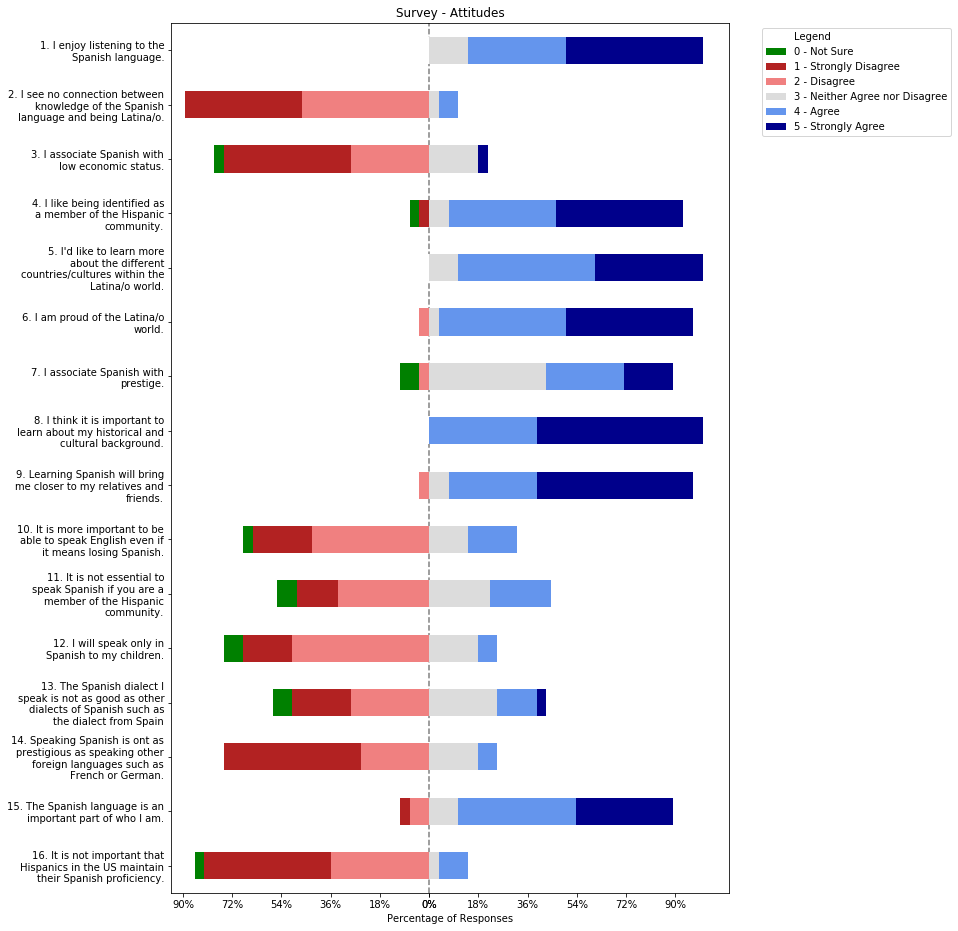

In [15]:
plot_likert.plot_counts(percentages, plot_likert.scales.scores5_0_custom, plot_percentage=True, colors=likert_colors, figsize=[10,16], title="Survey - Attitudes")